## Missing value imputation with fillna, dropna and interpolate

In [88]:
import pandas as pd
import seaborn as sb

In [89]:
df = pd.read_csv('/Users/swaruptripathy/Desktop/Data Science/datasets/weather_data.csv')
df.set_index('day',inplace=True)

In [93]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


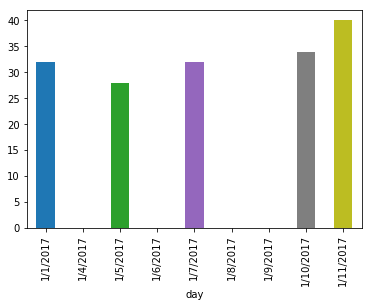

In [91]:
%matplotlib inline
df.temperature.plot.bar()

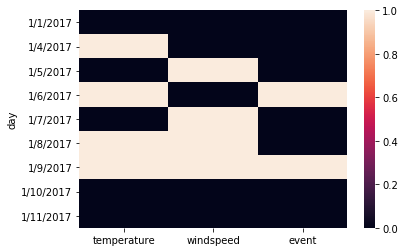

In [92]:
sb.heatmap(df.isnull())

### Filling Null values

In [74]:
new_df = df.fillna(0)

In [75]:
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,0
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,0
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [76]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'no event'
    })

In [77]:
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,no event
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,no event
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [78]:
#Forward fill
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,32.0,9.0,Sunny
1/5/2017,28.0,9.0,Snow
1/6/2017,28.0,7.0,Snow
1/7/2017,32.0,7.0,Rain
1/8/2017,32.0,7.0,Sunny
1/9/2017,32.0,7.0,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [79]:
#Backward fill
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,28.0,9.0,Sunny
1/5/2017,28.0,7.0,Snow
1/6/2017,32.0,7.0,Rain
1/7/2017,32.0,8.0,Rain
1/8/2017,34.0,8.0,Sunny
1/9/2017,34.0,8.0,Cloudy
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


### Linear Interpolation

In [80]:
#Linear Interpolation
#linear interpolation is a method of curve fitting using linear polynomials 
#to construct new data points 
#within the range of a discrete set of known data points.
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.000000,6.00,Rain
1/4/2017,30.000000,9.00,Sunny
1/5/2017,28.000000,8.00,Snow
1/6/2017,30.000000,7.00,NaN
1/7/2017,32.000000,7.25,Rain
1/8/2017,32.666667,7.50,Sunny
1/9/2017,33.333333,7.75,NaN
1/10/2017,34.000000,8.00,Cloudy
1/11/2017,40.000000,12.00,Sunny


### Dropping Null Rows

In [81]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [82]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [83]:
#Drop rows having all null values
new_df = df.dropna(how="all")
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [84]:
#Need two valid values in order to keep the row
new_df = df.dropna(thresh=2)
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/7/2017,32.0,NaN,Rain
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny
